In [1]:
import os
import pandas as pd
from jenkspy import JenksNaturalBreaks
import matplotlib.pyplot as plt
from IPython.display import display
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import pandas as pd
import csv
from collections import Counter

new_path = '../'
os.chdir(new_path)
df=pd.read_csv('data/aneurysm_data_melted.csv')


In [2]:
features=df.columns.tolist()
for featureName in features[:-1]:
    numberOfZero=df[featureName][(df[featureName] == 0)].astype(int).count()
    total= df[featureName].count()
    p=(50*total)/100 
    if (numberOfZero>p):
        print(featureName,'Total Number of Zero: ', numberOfZero,'out of', df[featureName].count())


Diabetes Total Number of Zero:  1631 out of 1934
Heart Disease Total Number of Zero:  1883 out of 1934
COPD Total Number of Zero:  1732 out of 1934
Polycystic Kidney Disese Total Number of Zero:  1911 out of 1934
Family_history Total Number of Zero:  1600 out of 1934


In [3]:
df = df.drop(columns=['loc_number'])

In [4]:
df['New_Loc'].value_counts().head(10)

New_Loc
Paraclinoid                      501
Anterior Communicating Artery    346
MCA                              322
SICA                             176
Cavernous Carotid                151
ICA                              108
Basilar Tip                       87
Pericallosal                      71
Carotid Terminus                  35
Distal Branch                     30
Name: count, dtype: int64

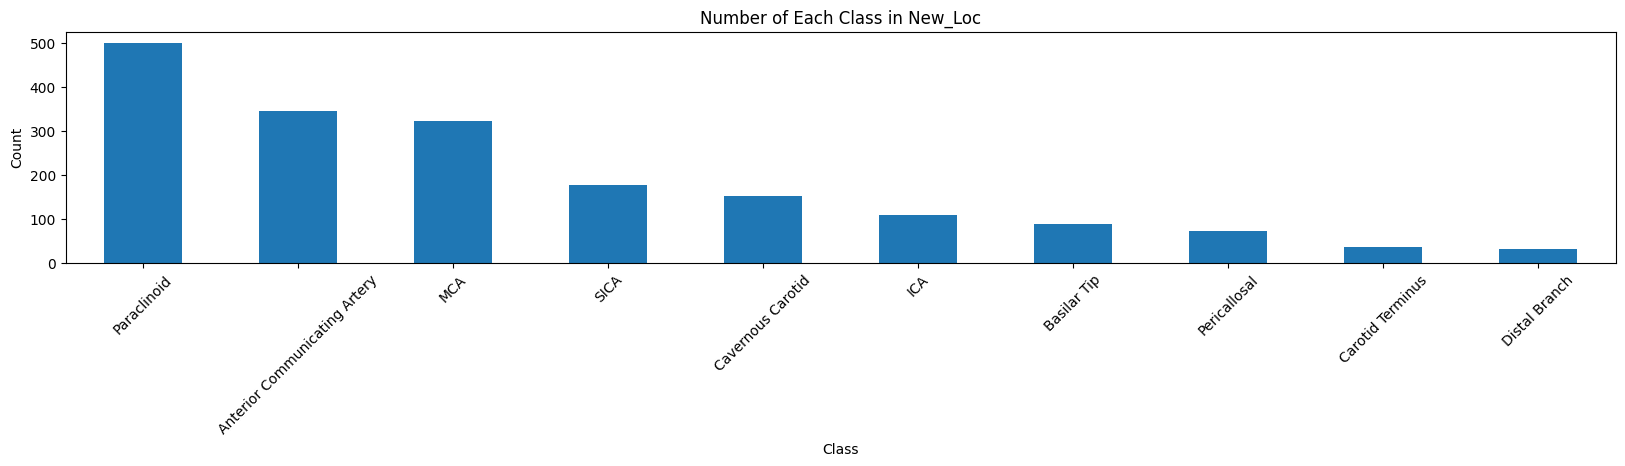

In [5]:
#TOTAL AMOUNT
class_counts = df['New_Loc'].value_counts().head(10)

# Now, you can create a bar chart using matplotlib
plt.figure(figsize=(20, 3))  # Adjust the figure size as needed

class_counts.plot(kind='bar')
plt.title('Number of Each Class in New_Loc')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long
plt.show()

In [6]:
df.columns

Index(['Record ID', 'Gender', 'Status of aneurysm', 'Diabetes', 'Hypertension',
       'Heart Disease', 'COPD', 'Polycystic Kidney Disese', 'Side',
       'Smoking History', 'diplopia', 'blurred vision', 'Loc',
       'Family_history', 'New_Loc', 'age_category', 'size_category',
       'Ethnicity'],
      dtype='object')

In [7]:
df.drop(['Loc'], axis=1, inplace=True) #getting rid of old loc to avoid false associations

print(len(df.columns))
print(df.columns)

17
Index(['Record ID', 'Gender', 'Status of aneurysm', 'Diabetes', 'Hypertension',
       'Heart Disease', 'COPD', 'Polycystic Kidney Disese', 'Side',
       'Smoking History', 'diplopia', 'blurred vision', 'Family_history',
       'New_Loc', 'age_category', 'size_category', 'Ethnicity'],
      dtype='object')


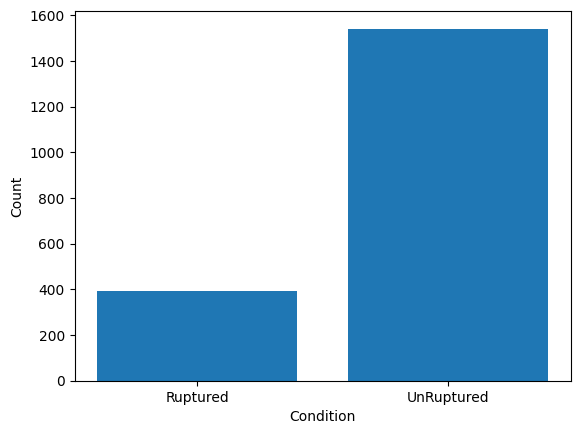

In [8]:
condition = df['Status of aneurysm'] == "Ruptured"

plt.bar(['Ruptured', 'UnRuptured'], [condition.sum(), len(df) - condition.sum()])
plt.xlabel('Condition')
plt.ylabel('Count')

plt.show()

In [10]:
shape=df.shape
column=shape[0]
row=shape[1]
column,row

(3382, 17)

C:\Users\Max Xiao\AppData\Local\Temp\ipykernel_39512\3587233920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ruptured.drop(['Status of aneurysm'], axis=1, inplace=True) #getting rid of old loc to avoid false associations
C:\Users\Max Xiao\AppData\Local\Temp\ipykernel_39512\3587233920.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UnRuptured.drop(['Status of aneurysm'], axis=1, inplace=True) #getting rid of old loc to avoid false associations


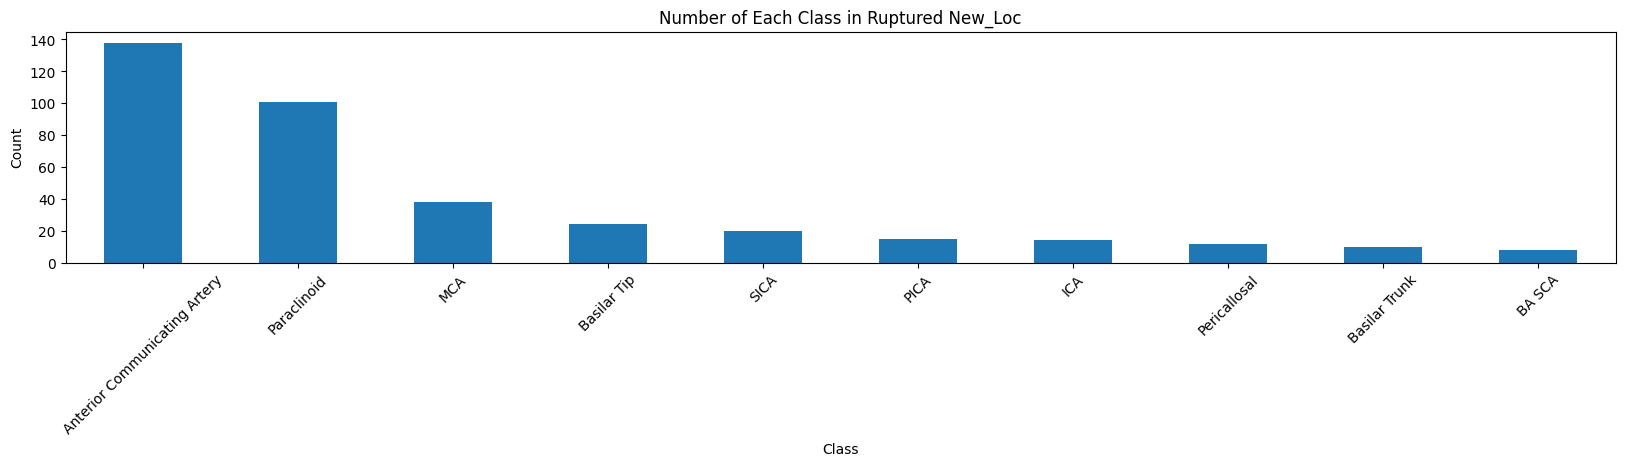

13

In [9]:

df_Ruptured = df[condition]
df_UnRuptured = df[~condition]

df_Ruptured.drop(['Status of aneurysm'], axis=1, inplace=True) #getting rid of old loc to avoid false associations
df_UnRuptured.drop(['Status of aneurysm'], axis=1, inplace=True) #getting rid of old loc to avoid false associations

ruptured_class_counts = df_Ruptured['New_Loc'].value_counts().head(10)

plt.figure(figsize=(20, 3))
ruptured_class_counts.plot(kind='bar')
plt.title('Number of Each Class in Ruptured New_Loc')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

len(df_Ruptured['New_Loc'].value_counts())

In [12]:
ACA_Ruptured = df_Ruptured[df_Ruptured["New_Loc"] == 'Anterior Communicating Artery']
MCA_Ruptured = df_Ruptured[df_Ruptured["New_Loc"] == 'MCA']
PC_Ruptured = df_Ruptured[df_Ruptured["New_Loc"] == 'Paraclinoid']
SICA_Ruptured = df_Ruptured[df_Ruptured["New_Loc"] == 'SICA']
DB_Ruptured = df_Ruptured[df_Ruptured["New_Loc"] == 'Distal Branch']
ICA_Ruptured = df_Ruptured[df_Ruptured["New_Loc"] == 'ICA']
CC_Ruptured = df_Ruptured[df_Ruptured["New_Loc"] == 'Cavernous Carotid']
BT_Ruptured = df_Ruptured[df_Ruptured["New_Loc"] == 'Basilar Trunk']

ACA_UnRuptured = df_UnRuptured[df_UnRuptured["New_Loc"] == 'Anterior Communicating Artery']
MCA_UnRuptured = df_UnRuptured[df_UnRuptured["New_Loc"] == 'MCA']
PC_UnRuptured = df_UnRuptured[df_UnRuptured["New_Loc"] == 'Paraclinoid']
SICA_UnRuptured = df_UnRuptured[df_UnRuptured["New_Loc"] == 'SICA']
DB_UnRuptured = df_UnRuptured[df_UnRuptured["New_Loc"] == 'Distal Branch']
ICA_UnRuptured = df_UnRuptured[df_UnRuptured["New_Loc"] == 'ICA']
CC_UnRuptured = df_UnRuptured[df_UnRuptured["New_Loc"] == 'Cavernous Carotid']
BT_UnRuptured = df_UnRuptured[df_UnRuptured["New_Loc"] == 'Basilar Trunk']

In [17]:
df.head()

,Record ID,Gender,Status of aneurysm,Diabetes,Hypertension,Heart Disease,COPD,Polycystic Kidney Disese,Side,Smoking History,diplopia,blurred vision,Family_history,New_Loc,age_category,size_category,Ethnicity
0,1,Female,Un-Ruptured,0,1,0,0,0,Left,Never Smoked,No,No,0,Cavernous Carotid,Silent Generation,tiny,White/Caucasian
1,2,Female,Un-Ruptured,0,1,0,0,0,at Bifurcation,Former Smoker,No,No,0,MCA,Baby Boomers,tiny,Black/African American
2,3,Male,Un-Ruptured,0,1,1,0,0,Bilateral,NaN,No,No,0,Basilar Trunk,Baby Boomers,tiny,White/Caucasian
3,5,Female,Un-Ruptured,0,1,0,0,0,Left,Current Smoker,No,No,0,Anterior Communicating Artery,Silent Generation,tiny,Black/African American
4,6,Female,Un-Ruptured,0,1,0,0,0,Right,Current Smoker,Yes,No,0,SICA,Gen - X,tiny,Black/African American


In [23]:
unique_locations = ['Cavernous Carotid', 'MCA', 'Basilar Trunk', 'Anterior Communicating Artery',
                    'SICA', 'Paraclinoid', 'Distal Branch', 'Basilar Tip', 'ICA', 'Pericallosal',
                    'Vertebral Artery', 'PICA', 'BA SCA', 'Carotid Terminus',
                    'Extra-Cranial: Internal Carotid', 'PCA']

# Dictionary to store separate DataFrames for each unique location
location_dfs = {}

# Iterate through unique locations and create separate DataFrames
for location in unique_locations:
    filtered_df = df[df['New_Loc'] == location]
    one_hot_encoded_df = pd.get_dummies(filtered_df)
    location_dfs[location] = one_hot_encoded_df
    

In [24]:
location_dfs['MCA'].head(5)

,Record ID,Diabetes,Hypertension,Heart Disease,COPD,Polycystic Kidney Disese,Family_history,Gender_Female,Gender_Male,Status of aneurysm_Ruptured,...,age_category_Gen - Y,age_category_Silent Generation,size_category_giant,size_category_large,size_category_medium,size_category_small,size_category_tiny,Ethnicity_Asian/Oriental,Ethnicity_Black/African American,Ethnicity_White/Caucasian
1,2,0,1,0,0,0,0,True,False,False,...,False,False,False,False,False,False,True,False,True,False
6,8,0,0,0,0,0,1,True,False,False,...,False,False,False,False,False,False,True,False,False,True
17,22,0,0,0,0,0,0,True,False,True,...,False,False,False,False,False,False,True,False,False,True
18,23,0,1,0,0,0,0,True,False,False,...,False,False,False,False,True,False,False,False,True,False
24,31,0,0,0,0,0,0,True,False,False,...,False,False,False,False,False,False,True,False,False,True


In [13]:
concatenated_ACA = pd.concat([ACA_Ruptured, ACA_UnRuptured])
concatenated_MCA = pd.concat([MCA_Ruptured, MCA_UnRuptured])
concatenated_PC = pd.concat([PC_Ruptured, PC_UnRuptured])
concatenated_SICA = pd.concat([SICA_Ruptured, SICA_UnRuptured])
concatenated_DB = pd.concat([DB_Ruptured, DB_UnRuptured])
concatenated_ICA = pd.concat([ICA_Ruptured, ICA_UnRuptured])
concatenated_CC = pd.concat([CC_Ruptured, CC_UnRuptured])
concatenated_BT = pd.concat([BT_Ruptured, BT_UnRuptured])

dummies_ACA = pd.get_dummies(concatenated_ACA)
dummies_MCA = pd.get_dummies(concatenated_MCA)
dummies_PC = pd.get_dummies(concatenated_PC)
dummies_SICA = pd.get_dummies(concatenated_SICA)
dummies_DB = pd.get_dummies(concatenated_DB)
dummies_ICA = pd.get_dummies(concatenated_ICA)
dummies_CC = pd.get_dummies(concatenated_CC)
dummies_BT = pd.get_dummies(concatenated_BT)

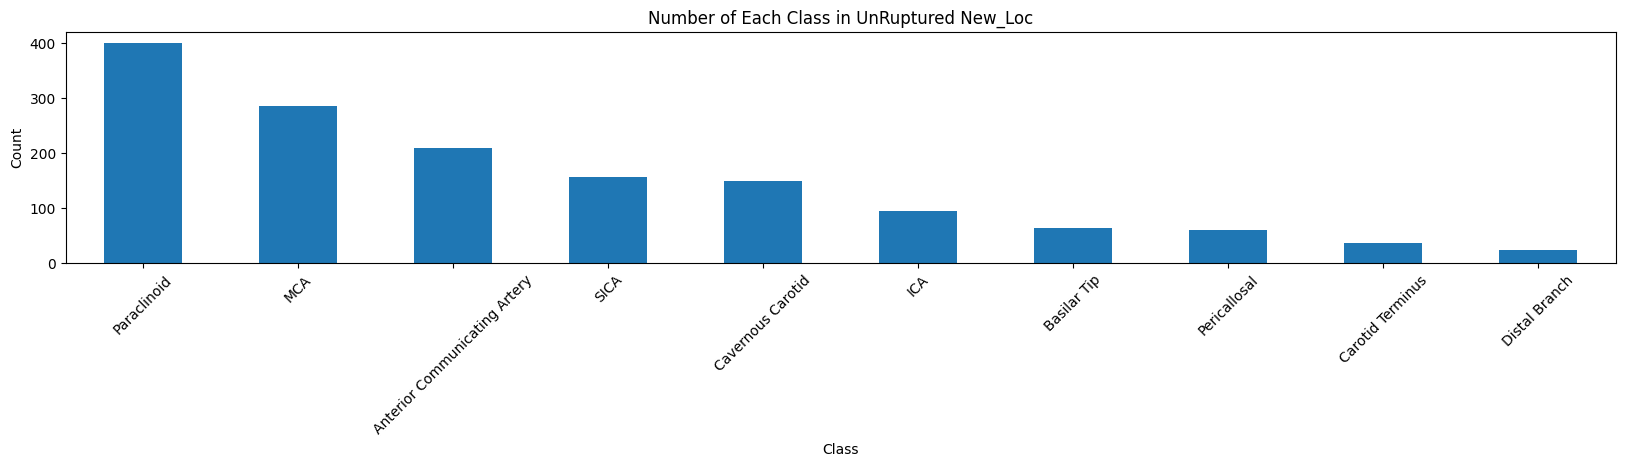

16

In [11]:

unruptured_class_counts = df_UnRuptured['New_Loc'].value_counts().head(10)

plt.figure(figsize=(20, 3))
unruptured_class_counts.plot(kind='bar')
plt.title('Number of Each Class in UnRuptured New_Loc')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

len(df_UnRuptured['New_Loc'].value_counts())

In [13]:
#ONE HOT ENCODING
ACA_Ruptured = pd.get_dummies(ACA_Ruptured)
MCA_Ruptured = pd.get_dummies(MCA_Ruptured)
PC_Ruptured = pd.get_dummies(PC_Ruptured)

SICA_Ruptured = pd.get_dummies(SICA_Ruptured)
DB_Ruptured = pd.get_dummies(DB_Ruptured)
ICA_Ruptured = pd.get_dummies(ICA_Ruptured)
CC_Ruptured = pd.get_dummies(CC_Ruptured)
BT_Ruptured = pd.get_dummies(BT_Ruptured)


ACA_UnRuptured = pd.get_dummies(ACA_UnRuptured)
MCA_UnRuptured = pd.get_dummies(MCA_UnRuptured)
PC_UnRuptured = pd.get_dummies(PC_UnRuptured)

SICA_UnRuptured = pd.get_dummies(SICA_UnRuptured)
DB_UnRuptured = pd.get_dummies(DB_UnRuptured)
ICA_UnRuptured = pd.get_dummies(ICA_UnRuptured)
CC_UnRuptured = pd.get_dummies(CC_UnRuptured)
BT_UnRuptured = pd.get_dummies(BT_UnRuptured)


# Get the shape of all DataFrames
shape_Ruptured_ACA = ACA_Ruptured.shape
shape_Ruptured_MCA = MCA_Ruptured.shape
shape_Ruptured_PC = PC_Ruptured.shape
shape_Ruptured_SICA = SICA_Ruptured.shape
shape_Ruptured_DB = DB_Ruptured.shape
shape_Ruptured_ICA = ICA_Ruptured.shape
shape_Ruptured_CC = CC_Ruptured.shape
shape_Ruptured_BT = BT_Ruptured.shape

shape_UnRuptured_ACA = ACA_UnRuptured.shape
shape_UnRuptured_MCA = MCA_UnRuptured.shape
shape_UnRuptured_PC = PC_UnRuptured.shape
shape_UnRuptured_SICA = SICA_UnRuptured.shape
shape_UnRuptured_DB = DB_UnRuptured.shape
shape_UnRuptured_ICA = ICA_UnRuptured.shape
shape_UnRuptured_CC = CC_UnRuptured.shape
shape_UnRuptured_BT = BT_UnRuptured.shape

# Print the shapes
print(f"Shape of ACA_Ruptured: {shape_Ruptured_ACA}")
print(f"Shape of MCA_Ruptured: {shape_Ruptured_MCA}")
print(f"Shape of PC_Ruptured: {shape_Ruptured_PC}")
print(f"Shape of SICA_Ruptured: {shape_Ruptured_SICA}")
print(f"Shape of DB_Ruptured: {shape_Ruptured_DB}")
print(f"Shape of ICA_Ruptured: {shape_Ruptured_ICA}")
print(f"Shape of CC_Ruptured: {shape_Ruptured_CC}")
print(f"Shape of BT_Ruptured: {shape_Ruptured_BT}")

print(f"Shape of ACA_UnRuptured: {shape_UnRuptured_ACA}")
print(f"Shape of MCA_UnRuptured: {shape_UnRuptured_MCA}")
print(f"Shape of PC_UnRuptured: {shape_UnRuptured_PC}")
print(f"Shape of SICA_UnRuptured: {shape_UnRuptured_SICA}")
print(f"Shape of DB_UnRuptured: {shape_UnRuptured_DB}")
print(f"Shape of ICA_UnRuptured: {shape_UnRuptured_ICA}")
print(f"Shape of CC_UnRuptured: {shape_UnRuptured_CC}")
print(f"Shape of BT_UnRuptured: {shape_UnRuptured_BT}")

Shape of ACA_Ruptured: (258, 35)
Shape of MCA_Ruptured: (119, 34)
Shape of PC_Ruptured: (218, 35)
Shape of SICA_Ruptured: (35, 30)
Shape of DB_Ruptured: (20, 28)
Shape of ICA_Ruptured: (42, 34)
Shape of CC_Ruptured: (6, 25)
Shape of BT_Ruptured: (17, 33)
Shape of ACA_UnRuptured: (326, 37)
Shape of MCA_UnRuptured: (540, 35)
Shape of PC_UnRuptured: (622, 36)
Shape of SICA_UnRuptured: (217, 35)
Shape of DB_UnRuptured: (52, 35)
Shape of ICA_UnRuptured: (202, 34)
Shape of CC_UnRuptured: (239, 35)
Shape of BT_UnRuptured: (27, 31)


In [14]:
# Set index for Ruptured DataFrames
ACA_Ruptured.set_index('Record ID', inplace=True)
MCA_Ruptured.set_index('Record ID', inplace=True)
PC_Ruptured.set_index('Record ID', inplace=True)
SICA_Ruptured.set_index('Record ID', inplace=True)
DB_Ruptured.set_index('Record ID', inplace=True)
ICA_Ruptured.set_index('Record ID', inplace=True)
CC_Ruptured.set_index('Record ID', inplace=True)
BT_Ruptured.set_index('Record ID', inplace=True)

# Set index for UnRuptured DataFrames
ACA_UnRuptured.set_index('Record ID', inplace=True)
MCA_UnRuptured.set_index('Record ID', inplace=True)
PC_UnRuptured.set_index('Record ID', inplace=True)
SICA_UnRuptured.set_index('Record ID', inplace=True)
DB_UnRuptured.set_index('Record ID', inplace=True)
ICA_UnRuptured.set_index('Record ID', inplace=True)
CC_UnRuptured.set_index('Record ID', inplace=True)
BT_UnRuptured.set_index('Record ID', inplace=True)


In [15]:
confidence=0.2
min_len=3
max_len = 10
min_support = 0.3

In [16]:
# Generate association rules for Ruptured DataFrames with min_support=0.3
ruptured_rules_ACA = association_rules(apriori(ACA_Ruptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)
ruptured_rules_MCA = association_rules(apriori(MCA_Ruptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)
ruptured_rules_PC = association_rules(apriori(PC_Ruptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)

ruptured_rules_SICA = association_rules(apriori(SICA_Ruptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)
ruptured_rules_DB = association_rules(apriori(DB_Ruptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)
ruptured_rules_ICA = association_rules(apriori(ICA_Ruptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)
ruptured_rules_CC = association_rules(apriori(CC_Ruptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)
ruptured_rules_BT = association_rules(apriori(BT_Ruptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)

# Generate association rules for UnRuptured DataFrames with min_support=0.3
unruptured_rules_ACA = association_rules(apriori(ACA_UnRuptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)
unruptured_rules_MCA = association_rules(apriori(MCA_UnRuptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)
unruptured_rules_PC = association_rules(apriori(PC_UnRuptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)

unruptured_rules_SICA = association_rules(apriori(SICA_UnRuptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)
unruptured_rules_DB = association_rules(apriori(DB_UnRuptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)
unruptured_rules_ICA = association_rules(apriori(ICA_UnRuptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)
unruptured_rules_CC = association_rules(apriori(CC_UnRuptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)
unruptured_rules_BT = association_rules(apriori(BT_UnRuptured, min_support=min_support, use_colnames=True), metric="lift", min_threshold=1)

# Sort and save the ruptured rules to CSV files
ruptured_rules_ACA = ruptured_rules_ACA.sort_values(['confidence', 'lift'], ascending=[False, False])
ruptured_rules_MCA = ruptured_rules_MCA.sort_values(['confidence', 'lift'], ascending=[False, False])
ruptured_rules_PC = ruptured_rules_PC.sort_values(['confidence', 'lift'], ascending=[False, False])
ruptured_rules_SICA = ruptured_rules_SICA.sort_values(['confidence', 'lift'], ascending=[False, False])
ruptured_rules_DB = ruptured_rules_DB.sort_values(['confidence', 'lift'], ascending=[False, False])
ruptured_rules_ICA = ruptured_rules_ICA.sort_values(['confidence', 'lift'], ascending=[False, False])
ruptured_rules_CC = ruptured_rules_CC.sort_values(['confidence', 'lift'], ascending=[False, False])
ruptured_rules_BT = ruptured_rules_BT.sort_values(['confidence', 'lift'], ascending=[False, False])

ruptured_rules_ACA.to_csv('./data/rules/ACA/ruptured_rules_ACA.csv', index=False)
ruptured_rules_MCA.to_csv('./data/rules/MCA/ruptured_rules_MCA.csv', index=False)
ruptured_rules_PC.to_csv('./data/rules/PC/ruptured_rules_PC.csv', index=False)
ruptured_rules_SICA.to_csv('./data/rules/SICA/ruptured_rules_SICA.csv', index=False)
ruptured_rules_DB.to_csv('./data/rules/DB/ruptured_rules_DB.csv', index=False)
ruptured_rules_ICA.to_csv('./data/rules/ICA/ruptured_rules_ICA.csv', index=False)
ruptured_rules_CC.to_csv('./data/rules/CC/ruptured_rules_CC.csv', index=False)
ruptured_rules_BT.to_csv('./data/rules/BT/ruptured_rules_BT.csv', index=False)

# Sort and save the unruptured rules to CSV files
unruptured_rules_ACA = unruptured_rules_ACA.sort_values(['confidence', 'lift'], ascending=[False, False])
unruptured_rules_MCA = unruptured_rules_MCA.sort_values(['confidence', 'lift'], ascending=[False, False])
unruptured_rules_PC = unruptured_rules_PC.sort_values(['confidence', 'lift'], ascending=[False, False])
unruptured_rules_SICA = unruptured_rules_SICA.sort_values(['confidence', 'lift'], ascending=[False, False])
unruptured_rules_DB = unruptured_rules_DB.sort_values(['confidence', 'lift'], ascending=[False, False])
unruptured_rules_ICA = unruptured_rules_ICA.sort_values(['confidence', 'lift'], ascending=[False, False])
unruptured_rules_CC = unruptured_rules_CC.sort_values(['confidence', 'lift'], ascending=[False, False])
unruptured_rules_BT = unruptured_rules_BT.sort_values(['confidence', 'lift'], ascending=[False, False])

unruptured_rules_ACA.to_csv('./data/rules/ACA/unruptured_rules_ACA.csv', index=False)
unruptured_rules_MCA.to_csv('./data/rules/MCA/unruptured_rules_MCA.csv', index=False)
unruptured_rules_PC.to_csv('./data/rules/PC/unruptured_rules_PC.csv', index=False)
unruptured_rules_SICA.to_csv('./data/rules/SICA/unruptured_rules_SICA.csv', index=False)
unruptured_rules_DB.to_csv('./data/rules/DB/unruptured_rules_DB.csv', index=False)
unruptured_rules_ICA.to_csv('./data/rules/ICA/unruptured_rules_ICA.csv', index=False)
unruptured_rules_CC.to_csv('./data/rules/CC/unruptured_rules_CC.csv', index=False)
unruptured_rules_BT.to_csv('./data/rules/BT/unruptured_rules_BT.csv', index=False)


c:\Code\Malik\venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Code\Malik\venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Code\Malik\venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Code\Malik\venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computatio

In [17]:
len(unruptured_rules_CC)
len(ruptured_rules_CC)

4364

In [18]:
ruptured_rules_ACA.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric'],
      dtype='object')

In [19]:
# File paths for the sorted rules CSV files
ruptured_ACA_file = './data/rules/ACA/ruptured_rules_ACA.csv'
ruptured_MCA_file = './data/rules/MCA/ruptured_rules_MCA.csv'
ruptured_PC_file = './data/rules/PC/ruptured_rules_PC.csv'
ruptured_SICA_file = './data/rules/SICA/ruptured_rules_SICA.csv'
ruptured_DB_file = './data/rules/DB/ruptured_rules_DB.csv'
ruptured_ICA_file = './data/rules/ICA/ruptured_rules_ICA.csv'
ruptured_CC_file = './data/rules/CC/ruptured_rules_CC.csv'
ruptured_BT_file = './data/rules/BT/ruptured_rules_BT.csv'


unruptured_ACA_file = './data/rules/ACA/unruptured_rules_ACA.csv'
unruptured_MCA_file = './data/rules/MCA/unruptured_rules_MCA.csv'
unruptured_PC_file = './data/rules/PC/unruptured_rules_PC.csv'
unruptured_SICA_file = './data/rules/SICA/unruptured_rules_SICA.csv'
unruptured_DB_file = './data/rules/DB/unruptured_rules_DB.csv'
unruptured_ICA_file = './data/rules/ICA/unruptured_rules_ICA.csv'
unruptured_CC_file = './data/rules/CC/unruptured_rules_CC.csv'
unruptured_BT_file = './data/rules/BT/unruptured_rules_BT.csv'


# Load the sorted rules into DataFrames
ruptured_rules_ACA = pd.read_csv(ruptured_ACA_file)
ruptured_rules_MCA = pd.read_csv(ruptured_MCA_file)
ruptured_rules_PC = pd.read_csv(ruptured_PC_file)
ruptured_rules_SICA = pd.read_csv(ruptured_SICA_file)
ruptured_rules_DB = pd.read_csv(ruptured_DB_file)
ruptured_rules_ICA = pd.read_csv(ruptured_ICA_file)
ruptured_rules_CC = pd.read_csv(ruptured_CC_file)
ruptured_rules_BT = pd.read_csv(ruptured_BT_file)

unruptured_rules_ACA = pd.read_csv(unruptured_ACA_file)
unruptured_rules_MCA = pd.read_csv(unruptured_MCA_file)
unruptured_rules_PC = pd.read_csv(unruptured_PC_file)
unruptured_rules_SICA = pd.read_csv(unruptured_SICA_file)
unruptured_rules_DB = pd.read_csv(unruptured_DB_file)
unruptured_rules_ICA = pd.read_csv(unruptured_ICA_file)
unruptured_rules_CC = pd.read_csv(unruptured_CC_file)
unruptured_rules_BT = pd.read_csv(unruptured_BT_file)

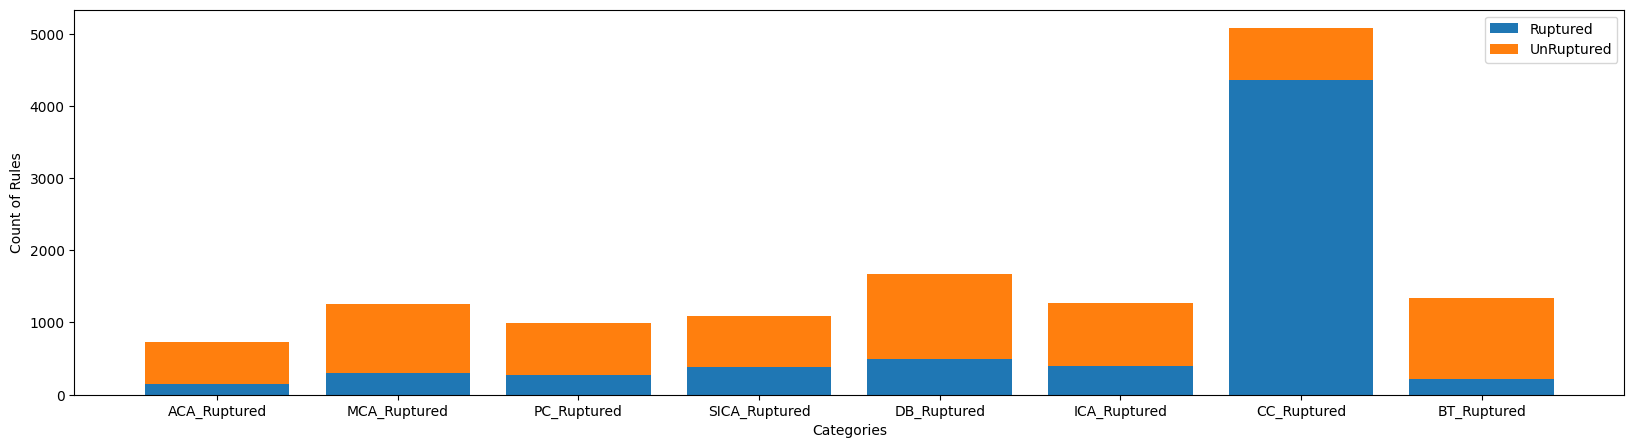

In [20]:
ruptured_rule_counts = [len(ruptured_rules_ACA), len(ruptured_rules_MCA), len(ruptured_rules_PC), len(ruptured_rules_SICA), len(ruptured_rules_DB), len(ruptured_rules_ICA), len(ruptured_rules_CC), len(ruptured_rules_BT)]
unruptured_rule_counts = [len(unruptured_rules_ACA), len(unruptured_rules_MCA), len(unruptured_rules_PC), len(unruptured_rules_SICA), len(unruptured_rules_DB), len(unruptured_rules_ICA), len(unruptured_rules_CC), len(unruptured_rules_BT)]

# Categories names
categories = ['ACA_Ruptured', 'MCA_Ruptured', 'PC_Ruptured', 'SICA_Ruptured', 'DB_Ruptured', 'ICA_Ruptured', 'CC_Ruptured', 'BT_Ruptured']
plt.figure(figsize=(20, 5))  # Adjust width and height as needed

# Plotting
plt.bar(categories, ruptured_rule_counts, label='Ruptured')
plt.bar(categories, unruptured_rule_counts, label='UnRuptured', bottom=ruptured_rule_counts)

plt.xlabel('Categories')
plt.ylabel('Count of Rules')
plt.legend()
plt.show()

In [21]:
common_columns = ['antecedents', 'consequents']

print("Number of Rules Beforehand- Ruptured ACA:", len(ruptured_rules_ACA))
print("Number of Rules Beforehand- Ruptured MCA:", len(ruptured_rules_MCA))
print("Number of Rules Beforehand- Ruptured PC:", len(ruptured_rules_PC))

# Getting the shared rules for each pair of UnRuptured and Ruptured
shared_rules_ACA = ruptured_rules_ACA.merge(unruptured_rules_ACA, on=common_columns, how='inner')
shared_rules_MCA = ruptured_rules_MCA.merge(unruptured_rules_MCA, on=common_columns, how='inner')
shared_rules_PC = ruptured_rules_PC.merge(unruptured_rules_PC, on=common_columns, how='inner')

shared_rules_SICA = ruptured_rules_SICA.merge(unruptured_rules_SICA, on=common_columns, how='inner')
shared_rules_DB = ruptured_rules_DB.merge(unruptured_rules_DB, on=common_columns, how='inner')
shared_rules_ICA = ruptured_rules_ICA.merge(unruptured_rules_ICA, on=common_columns, how='inner')
shared_rules_CC = ruptured_rules_CC.merge(unruptured_rules_CC, on=common_columns, how='inner')
shared_rules_BT = ruptured_rules_BT.merge(unruptured_rules_BT, on=common_columns, how='inner')


print("Shared Rules - ACA:", len(shared_rules_ACA))
print("Shared Rules - MCA:", len(shared_rules_MCA))
print("Shared Rules - PC:", len(shared_rules_PC))

# Filter out shared rules for each pair of UnRuptured and Ruptured
ruptured_rules_ACA = ruptured_rules_ACA[~ruptured_rules_ACA.set_index(common_columns).index.isin(shared_rules_ACA.set_index(common_columns).index)]
ruptured_rules_MCA = ruptured_rules_MCA[~ruptured_rules_MCA.set_index(common_columns).index.isin(shared_rules_MCA.set_index(common_columns).index)]
ruptured_rules_PC = ruptured_rules_PC[~ruptured_rules_PC.set_index(common_columns).index.isin(shared_rules_PC.set_index(common_columns).index)]
ruptured_rules_SICA = ruptured_rules_SICA[~ruptured_rules_SICA.set_index(common_columns).index.isin(shared_rules_SICA.set_index(common_columns).index)]
ruptured_rules_DB = ruptured_rules_DB[~ruptured_rules_DB.set_index(common_columns).index.isin(shared_rules_DB.set_index(common_columns).index)]
ruptured_rules_ICA = ruptured_rules_ICA[~ruptured_rules_ICA.set_index(common_columns).index.isin(shared_rules_ICA.set_index(common_columns).index)]
ruptured_rules_CC = ruptured_rules_CC[~ruptured_rules_CC.set_index(common_columns).index.isin(shared_rules_CC.set_index(common_columns).index)]
ruptured_rules_BT = ruptured_rules_BT[~ruptured_rules_BT.set_index(common_columns).index.isin(shared_rules_BT.set_index(common_columns).index)]

unruptured_rules_ACA = unruptured_rules_ACA[~unruptured_rules_ACA.set_index(common_columns).index.isin(shared_rules_ACA.set_index(common_columns).index)]
unruptured_rules_MCA = unruptured_rules_MCA[~unruptured_rules_MCA.set_index(common_columns).index.isin(shared_rules_MCA.set_index(common_columns).index)]
unruptured_rules_PC = unruptured_rules_PC[~unruptured_rules_PC.set_index(common_columns).index.isin(shared_rules_PC.set_index(common_columns).index)]
unruptured_rules_SICA = unruptured_rules_SICA[~unruptured_rules_SICA.set_index(common_columns).index.isin(shared_rules_SICA.set_index(common_columns).index)]
unruptured_rules_DB = unruptured_rules_DB[~unruptured_rules_DB.set_index(common_columns).index.isin(shared_rules_DB.set_index(common_columns).index)]
unruptured_rules_ICA = unruptured_rules_ICA[~unruptured_rules_ICA.set_index(common_columns).index.isin(shared_rules_ICA.set_index(common_columns).index)]
unruptured_rules_CC = unruptured_rules_CC[~unruptured_rules_CC.set_index(common_columns).index.isin(shared_rules_CC.set_index(common_columns).index)]
unruptured_rules_BT = unruptured_rules_BT[~unruptured_rules_BT.set_index(common_columns).index.isin(shared_rules_BT.set_index(common_columns).index)]


num_rows_ACA, num_columns_ACA = ruptured_rules_ACA.shape
num_rows_MCA, num_columns_MCA = ruptured_rules_MCA.shape
num_rows_PC, num_columns_PC = ruptured_rules_PC.shape
num_rows_SICA, num_columns_SICA = ruptured_rules_SICA.shape
num_rows_DB, num_columns_DB = ruptured_rules_DB.shape
num_rows_ICA, num_columns_ICA = ruptured_rules_ICA.shape
num_rows_CC, num_columns_CC = ruptured_rules_CC.shape
num_rows_BT, num_columns_BT = ruptured_rules_BT.shape


print("Remaining Rules - ACA:", num_rows_ACA, num_columns_ACA)
print("Remaining Rules - MCA:", num_rows_MCA, num_columns_MCA)
print("Remaining Rules - PC:", num_rows_PC, num_columns_PC)
print("Remaining Rules - SICA:", num_rows_SICA, num_columns_SICA)
print("Remaining Rules - DB:", num_rows_DB, num_columns_DB)
print("Remaining Rules - ICA:", num_rows_ICA, num_columns_ICA)
print("Remaining Rules - CC:", num_rows_CC, num_columns_CC)
print("Remaining Rules - BT:", num_rows_BT, num_columns_BT)


Number of Rules Beforehand- Ruptured ACA: 146
Number of Rules Beforehand- Ruptured MCA: 296
Number of Rules Beforehand- Ruptured PC: 278
Shared Rules - ACA: 78
Shared Rules - MCA: 94
Shared Rules - PC: 136
Remaining Rules - ACA: 68 10
Remaining Rules - MCA: 202 10
Remaining Rules - PC: 142 10
Remaining Rules - SICA: 208 10
Remaining Rules - DB: 434 10
Remaining Rules - ICA: 154 10
Remaining Rules - CC: 3982 10
Remaining Rules - BT: 116 10


In [22]:
import re
def extract_items(input_string):
    # Use regular expression to extract items within single quotes
    pattern = r"'(.*?)'"
    extracted_items = re.findall(pattern, input_string)
    return extracted_items

In [23]:
# Assuming you have the extract_items function defined and the DataFrames ruptured_rules_ACA, ruptured_rules_MCA, ruptured_rules_PC, 
# unruptured_rules_ACA, unruptured_rules_MCA, unruptured_rules_PC

# List of Ruptured DataFrames
ruptured_dataframes = [ruptured_rules_ACA, ruptured_rules_MCA, ruptured_rules_PC, ruptured_rules_SICA, ruptured_rules_DB, ruptured_rules_ICA, ruptured_rules_CC, ruptured_rules_BT]

# List of Unruptured DataFrames
unruptured_dataframes = [unruptured_rules_ACA, unruptured_rules_MCA, unruptured_rules_PC, unruptured_rules_SICA, unruptured_rules_DB, unruptured_rules_ICA, unruptured_rules_CC, unruptured_rules_BT]

# Process Ruptured DataFrames
for df in ruptured_dataframes:
    df['antecedents'] = df['antecedents'].apply(extract_items)
    df['consequents'] = df['consequents'].apply(extract_items)
    df['combined_length'] = df.apply(lambda row: len(row['antecedents']) + len(row['consequents']), axis=1)
    df = df[df['combined_length'] >= 3]
    num_rows, num_columns = df.shape
   

# Process Unruptured DataFrames
for df in unruptured_dataframes:
    df['antecedents'] = df['antecedents'].apply(extract_items)
    df['consequents'] = df['consequents'].apply(extract_items)
    df['combined_length'] = df.apply(lambda row: len(row['antecedents']) + len(row['consequents']), axis=1)
    df = df[df['combined_length'] >= 3]
    num_rows, num_columns = df.shape

In [24]:
print("Ruptured Rules - ACA: ", ruptured_rules_ACA.shape)
print("Ruptured Rules - MCA: ", ruptured_rules_MCA.shape)
print("Ruptured Rules - PC: ", ruptured_rules_PC.shape)
print("Ruptured Rules - SICA: ", ruptured_rules_SICA.shape)
print("Ruptured Rules - DB: ", ruptured_rules_DB.shape)
print("Ruptured Rules - ICA: ", ruptured_rules_ICA.shape)
print("Ruptured Rules - CC: ", ruptured_rules_CC.shape)
print("Ruptured Rules - BT: ", ruptured_rules_BT.shape)


print("Unruptured Rules - ACA: ", unruptured_rules_ACA.shape)
print("Unruptured Rules - MCA: ", unruptured_rules_MCA.shape)
print("Unruptured Rules - PC: ", unruptured_rules_PC.shape)
print("Unruptured Rules - SICA: ", unruptured_rules_SICA.shape)
print("Unruptured Rules - DB: ", unruptured_rules_DB.shape)
print("Unruptured Rules - ICA: ", unruptured_rules_ICA.shape)
print("Unruptured Rules - CC: ", unruptured_rules_CC.shape)
print("Unruptured Rules - BT: ", unruptured_rules_BT.shape)



Ruptured Rules - ACA:  (68, 11)
Ruptured Rules - MCA:  (202, 11)
Ruptured Rules - PC:  (142, 11)
Ruptured Rules - SICA:  (208, 11)
Ruptured Rules - DB:  (434, 11)
Ruptured Rules - ICA:  (154, 11)
Ruptured Rules - CC:  (3982, 11)
Ruptured Rules - BT:  (116, 11)
Unruptured Rules - ACA:  (500, 11)
Unruptured Rules - MCA:  (872, 11)
Unruptured Rules - PC:  (572, 11)
Unruptured Rules - SICA:  (528, 11)
Unruptured Rules - DB:  (1106, 11)
Unruptured Rules - ICA:  (636, 11)
Unruptured Rules - CC:  (336, 11)
Unruptured Rules - BT:  (1028, 11)


In [25]:
#Filter for confidence

In [26]:
#filtering so only if size and loc are in the ruleset

# Filter rules based on condition
def has_condition_string(row):

    antecedents = ' '.join(row['antecedents'])  # Combine antecedents into a single string
    consequents = ' '.join(row['consequents'])  # Combine consequents into a single string

    
    return ("size_category" in antecedents or "size_category" in consequents) 

# Filter rules for ACA
ruptured_rules_ACA = ruptured_rules_ACA[ruptured_rules_ACA.apply(has_condition_string, axis=1)]
print("Filtered Ruptured Rules - ACA: ", ruptured_rules_ACA.shape)

# Filter rules for MCA
ruptured_rules_MCA = ruptured_rules_MCA[ruptured_rules_MCA.apply(has_condition_string, axis=1)]
print("Filtered Ruptured Rules - MCA: ", ruptured_rules_MCA.shape)

# Filter rules for PC
ruptured_rules_PC = ruptured_rules_PC[ruptured_rules_PC.apply(has_condition_string, axis=1)]
print("Filtered Ruptured Rules - PC: ", ruptured_rules_PC.shape)

# Filter rules for SICA
ruptured_rules_SICA = ruptured_rules_SICA[ruptured_rules_SICA.apply(has_condition_string, axis=1)]
print("Filtered Ruptured Rules - SICA: ", ruptured_rules_SICA.shape)

# Filter rules for DB
ruptured_rules_DB = ruptured_rules_DB[ruptured_rules_DB.apply(has_condition_string, axis=1)]
print("Filtered Ruptured Rules - DB: ", ruptured_rules_DB.shape)

# Filter rules for ICA
ruptured_rules_ICA = ruptured_rules_ICA[ruptured_rules_ICA.apply(has_condition_string, axis=1)]
print("Filtered Ruptured Rules - ICA: ", ruptured_rules_ICA.shape)

# Filter rules for CC
ruptured_rules_CC = ruptured_rules_CC[ruptured_rules_CC.apply(has_condition_string, axis=1)]
print("Filtered Ruptured Rules - CC: ", ruptured_rules_CC.shape)

# Filter rules for BT
ruptured_rules_BT = ruptured_rules_BT[ruptured_rules_BT.apply(has_condition_string, axis=1)]
print("Filtered Ruptured Rules - BT: ", ruptured_rules_BT.shape)

# Filter rules for Unruptured ACA
unruptured_rules_ACA = unruptured_rules_ACA[unruptured_rules_ACA.apply(has_condition_string, axis=1)]
print("Filtered Unruptured Rules - ACA: ", unruptured_rules_ACA.shape)

# Filter rules for Unruptured MCA
unruptured_rules_MCA = unruptured_rules_MCA[unruptured_rules_MCA.apply(has_condition_string, axis=1)]
print("Filtered Unruptured Rules - MCA: ", unruptured_rules_MCA.shape)

# Filter rules for Unruptured PC
unruptured_rules_PC = unruptured_rules_PC[unruptured_rules_PC.apply(has_condition_string, axis=1)]
print("Filtered Unruptured Rules - PC: ", unruptured_rules_PC.shape)

# Filter rules for Unruptured SICA
unruptured_rules_SICA = unruptured_rules_SICA[unruptured_rules_SICA.apply(has_condition_string, axis=1)]
print("Filtered Unruptured Rules - SICA: ", unruptured_rules_SICA.shape)

# Filter rules for Unruptured DB
unruptured_rules_DB = unruptured_rules_DB[unruptured_rules_DB.apply(has_condition_string, axis=1)]
print("Filtered Unruptured Rules - DB: ", unruptured_rules_DB.shape)

# Filter rules for Unruptured ICA
unruptured_rules_ICA = unruptured_rules_ICA[unruptured_rules_ICA.apply(has_condition_string, axis=1)]
print("Filtered Unruptured Rules - ICA: ", unruptured_rules_ICA.shape)

# Filter rules for Unruptured CC
unruptured_rules_CC = unruptured_rules_CC[unruptured_rules_CC.apply(has_condition_string, axis=1)]
print("Filtered Unruptured Rules - CC: ", unruptured_rules_CC.shape)

# Filter rules for Unruptured BT
unruptured_rules_BT = unruptured_rules_BT[unruptured_rules_BT.apply(has_condition_string, axis=1)]
print("Filtered Unruptured Rules - BT: ", unruptured_rules_BT.shape)


Filtered Ruptured Rules - ACA:  (16, 11)
Filtered Ruptured Rules - MCA:  (128, 11)
Filtered Ruptured Rules - PC:  (84, 11)
Filtered Ruptured Rules - SICA:  (78, 11)
Filtered Ruptured Rules - DB:  (144, 11)
Filtered Ruptured Rules - ICA:  (70, 11)
Filtered Ruptured Rules - CC:  (824, 11)
Filtered Ruptured Rules - BT:  (8, 11)
Filtered Unruptured Rules - ACA:  (142, 11)
Filtered Unruptured Rules - MCA:  (274, 11)
Filtered Unruptured Rules - PC:  (20, 11)
Filtered Unruptured Rules - SICA:  (46, 11)
Filtered Unruptured Rules - DB:  (380, 11)
Filtered Unruptured Rules - ICA:  (172, 11)
Filtered Unruptured Rules - CC:  (68, 11)
Filtered Unruptured Rules - BT:  (38, 11)


In [30]:
ruptured_rules_ACA = ruptured_rules_ACA[ruptured_rules_ACA['confidence'] > 0.5]
ruptured_rules_MCA = ruptured_rules_MCA[ruptured_rules_MCA['confidence'] > 0.5]
ruptured_rules_PC = ruptured_rules_PC[ruptured_rules_PC['confidence'] > 0.5]
ruptured_rules_SICA = ruptured_rules_SICA[ruptured_rules_SICA['confidence'] > 0.5]
ruptured_rules_DB = ruptured_rules_DB[ruptured_rules_DB['confidence'] > 0.5]
ruptured_rules_ICA = ruptured_rules_ICA[ruptured_rules_ICA['confidence'] > 0.5]
ruptured_rules_CC = ruptured_rules_CC[ruptured_rules_CC['confidence'] > 0.5]
ruptured_rules_BT = ruptured_rules_BT[ruptured_rules_BT['confidence'] > 0.5]


In [31]:
print("Ruptured Rules - ACA: ", ruptured_rules_ACA.shape)
print("Ruptured Rules - MCA: ", ruptured_rules_MCA.shape)
print("Ruptured Rules - PC: ", ruptured_rules_PC.shape)
print("Ruptured Rules - SICA: ", ruptured_rules_SICA.shape)
print("Ruptured Rules - DB: ", ruptured_rules_DB.shape)
print("Ruptured Rules - ICA: ", ruptured_rules_ICA.shape)
print("Ruptured Rules - CC: ", ruptured_rules_CC.shape)
print("Ruptured Rules - BT: ", ruptured_rules_BT.shape)

Ruptured Rules - ACA:  (14, 11)
Ruptured Rules - MCA:  (100, 11)
Ruptured Rules - PC:  (66, 11)
Ruptured Rules - SICA:  (57, 11)
Ruptured Rules - DB:  (102, 11)
Ruptured Rules - ICA:  (53, 11)
Ruptured Rules - CC:  (532, 11)
Ruptured Rules - BT:  (7, 11)


In [29]:
# Save filtered DataFrames to CSV files
ruptured_rules_ACA.to_csv('./data/rules/ACA/filtered_ruptured_rules_ACA.csv', index=False)
ruptured_rules_MCA.to_csv('./data/rules/MCA/filtered_ruptured_rules_MCA.csv', index=False)
ruptured_rules_PC.to_csv('./data/rules/PC/filtered_ruptured_rules_PC.csv', index=False)
ruptured_rules_SICA.to_csv('./data/rules/SICA/filtered_ruptured_rules_SICA.csv', index=False)
ruptured_rules_DB.to_csv('./data/rules/DB/filtered_ruptured_rules_DB.csv', index=False)
ruptured_rules_ICA.to_csv('./data/rules/ICA/filtered_ruptured_rules_ICA.csv', index=False)
ruptured_rules_CC.to_csv('./data/rules/CC/filtered_ruptured_rules_CC.csv', index=False)
ruptured_rules_BT.to_csv('./data/rules/BT/filtered_ruptured_rules_BT.csv', index=False)

unruptured_rules_ACA.to_csv('./data/rules/ACA/filtered_unruptured_rules_ACA.csv', index=False)
unruptured_rules_MCA.to_csv('./data/rules/MCA/filtered_unruptured_rules_MCA.csv', index=False)
unruptured_rules_PC.to_csv('./data/rules/PC/filtered_unruptured_rules_PC.csv', index=False)
unruptured_rules_SICA.to_csv('./data/rules/SICA/filtered_unruptured_rules_SICA.csv', index=False)
unruptured_rules_DB.to_csv('./data/rules/DB/filtered_unruptured_rules_DB.csv', index=False)
unruptured_rules_ICA.to_csv('./data/rules/ICA/filtered_unruptured_rules_ICA.csv', index=False)
unruptured_rules_CC.to_csv('./data/rules/CC/filtered_unruptured_rules_CC.csv', index=False)
unruptured_rules_BT.to_csv('./data/rules/BT/filtered_unruptured_rules_BT.csv', index=False)
